# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

In [3]:
url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Count Through Data
record = 1
set = 1
# Create weatherPy dataframe
weather_df = pd.DataFrame({'City': cities})
weather_df['Lat'] = ''
weather_df['Lng'] = ''
weather_df['Max Temp'] = ''
weather_df['Humidity'] = ''
weather_df['Cloudiness'] = ''
weather_df['Wind Speed'] = ''
weather_df['Country'] = ''
weather_df['Date'] = ''
print('Beginning Data Retrieval')
print('-------------------------------')
# Loop through weather_df
for index, row in weather_df.iterrows():
    city = row['City']
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
    response = requests.get(url).json()
    try:
        print(f'Processing Record {record} of Set {set} | {city}')
        weather_df.loc[index, 'Lat'] = response['coord']['lat']
        weather_df.loc[index, 'Lng'] = response["coord"]['lon']
        weather_df.loc[index, 'Max Temp'] = response['main']["temp_max"]
        weather_df.loc[index, 'Humidity'] = response['main']["humidity"]
        weather_df.loc[index, 'Cloudiness'] = response['clouds']["all"]
        weather_df.loc[index, 'Wind Speed'] = response['wind']["speed"]
        weather_df.loc[index, 'Country'] = response['sys']["country"]
        weather_df.loc[index, 'Date'] = response['dt']
    except:
        print(f'City not found')
    record += 1
    if record == 51:
        record = 1
        set += 1
print('-------------------------------')
print('Data Retrieval Complete')

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | onega
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | bar harbor
Processing Record 6 of Set 1 | mana
Processing Record 7 of Set 1 | hambantota
Processing Record 8 of Set 1 | manokwari
Processing Record 9 of Set 1 | ostrovnoy
Processing Record 10 of Set 1 | floro
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | airai
Processing Record 14 of Set 1 | northam
Processing Record 15 of Set 1 | fallon
Processing Record 16 of Set 1 | nome
Processing Record 17 of Set 1 | ballina
Processing Record 18 of Set 1 | sao joao da barra
Processing Record 19 of Set 1 | chebenki
Processing Record 20 of Set 1 | constitucion
Processing Record 21 of Set 1 | micheweni
Processing Record 22 of Set 1 | nikolskoye
Processing Record 23 of Set 1 | valparaiso
Processin

Processing Record 45 of Set 4 | leningradskiy
Processing Record 46 of Set 4 | asau
Processing Record 47 of Set 4 | palabuhanratu
City not found
Processing Record 48 of Set 4 | baton rouge
Processing Record 49 of Set 4 | cabedelo
Processing Record 50 of Set 4 | mae hong son
Processing Record 1 of Set 5 | akyab
Processing Record 2 of Set 5 | brae
Processing Record 3 of Set 5 | sinjar
Processing Record 4 of Set 5 | douglas
Processing Record 5 of Set 5 | cidreira
Processing Record 6 of Set 5 | grand river south east
City not found
Processing Record 7 of Set 5 | lagoa
Processing Record 8 of Set 5 | san vicente
Processing Record 9 of Set 5 | glendive
Processing Record 10 of Set 5 | irtyshskiy
Processing Record 11 of Set 5 | belize
Processing Record 12 of Set 5 | portland
Processing Record 13 of Set 5 | padang
Processing Record 14 of Set 5 | georgetown
Processing Record 15 of Set 5 | poplar bluff
Processing Record 16 of Set 5 | talnakh
Processing Record 17 of Set 5 | iquitos
Processing Record

Processing Record 40 of Set 8 | comodoro rivadavia
Processing Record 41 of Set 8 | buin
Processing Record 42 of Set 8 | naranjal
Processing Record 43 of Set 8 | puerto leguizamo
Processing Record 44 of Set 8 | marsa matruh
Processing Record 45 of Set 8 | huarmey
Processing Record 46 of Set 8 | puri
Processing Record 47 of Set 8 | walvis bay
Processing Record 48 of Set 8 | ambilobe
Processing Record 49 of Set 8 | grodzisk wielkopolski
Processing Record 50 of Set 8 | hukuntsi
Processing Record 1 of Set 9 | daru
Processing Record 2 of Set 9 | la ronge
Processing Record 3 of Set 9 | maragogi
Processing Record 4 of Set 9 | marica
Processing Record 5 of Set 9 | kaliganj
Processing Record 6 of Set 9 | pinawa
Processing Record 7 of Set 9 | salamanca
Processing Record 8 of Set 9 | sydney
Processing Record 9 of Set 9 | richards bay
Processing Record 10 of Set 9 | uzhur-4
City not found
Processing Record 11 of Set 9 | bilibino
Processing Record 12 of Set 9 | buala
Processing Record 13 of Set 9 | 

Processing Record 31 of Set 12 | nizhnevartovsk
Processing Record 32 of Set 12 | roura
Processing Record 33 of Set 12 | bilma
Processing Record 34 of Set 12 | fort nelson
Processing Record 35 of Set 12 | vicuna
Processing Record 36 of Set 12 | yerbogachen
Processing Record 37 of Set 12 | rawson
Processing Record 38 of Set 12 | skalistyy
City not found
Processing Record 39 of Set 12 | moron
Processing Record 40 of Set 12 | patrasaer
Processing Record 41 of Set 12 | mattru
Processing Record 42 of Set 12 | emba
Processing Record 43 of Set 12 | teguise
Processing Record 44 of Set 12 | khujner
Processing Record 45 of Set 12 | obo
Processing Record 46 of Set 12 | kirakira
Processing Record 47 of Set 12 | opuwo
Processing Record 48 of Set 12 | pasighat
Processing Record 49 of Set 12 | atar
Processing Record 50 of Set 12 | igdir
Processing Record 1 of Set 13 | acapulco
Processing Record 2 of Set 13 | altus
Processing Record 3 of Set 13 | reinosa
Processing Record 4 of Set 13 | alta floresta
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df.count()

City          626
Lat           626
Lng           626
Max Temp      626
Humidity      626
Cloudiness    626
Wind Speed    626
Country       626
Date          626
dtype: int64

In [6]:
weather_df.to_csv('../output_data/weatherpy_city_data.csv')

In [7]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cape town,-33.93,18.42,288.15,93,75,2.6,ZA,1595724487
1,hilo,19.73,-155.09,302.15,58,90,3.6,US,1595724832
2,onega,63.91,38.14,285.84,78,51,2.2,RU,1595724894
3,castro,-24.79,-50.01,286.2,89,99,0.9,BR,1595724894
4,bar harbor,44.39,-68.2,295.37,68,1,3.6,US,1595724894


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
weather_df["Humidity"] = pd.to_numeric(weather_df["Humidity"])
hhcities = weather_df.loc[weather_df["Humidity"] > 100]
hhcities


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [11]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [12]:
weather_df["Max Temp"] = pd.to_numeric(weather_df["Max Temp"])
weather_df["Lat"] = pd.to_numeric(weather_df["Lat"])
weather_df["Cloudiness"] = pd.to_numeric(weather_df["Cloudiness"])
weather_df["Wind Speed"] = pd.to_numeric(weather_df["Wind Speed"])

## Latitude vs. Temperature Plot

In [13]:
# Create new database for Scatter Plot
lat_vs_temp = weather_df[["Lat", "Max Temp"]]

# Turn values in "Max Temp" into fahrenheit instead of calvin
lat_vs_temp["Max Temp (F)"] = lat_vs_temp["Max Temp"] * 9/5 - 459.67

C:\Users\shelt\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


C:\Users\shelt\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\shelt\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


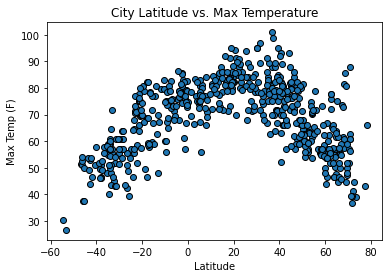

In [37]:
lat_vs_temp["Lat"] = pd.to_numeric(lat_vs_temp["Lat"])
lat_vs_temp["Max Temp"] = pd.to_numeric(lat_vs_temp["Max Temp"])
x_axis = lat_vs_temp["Lat"]
y_axis = lat_vs_temp["Max Temp (F)"]
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
lat_vs_temp_plot = plt.scatter(x_axis, y_axis, edgecolors="black")
plt.savefig('../output_data/scatter_temp.png')

In [15]:
# This plot is showing the changes in maximum temperatures in different cities with different distances from the equator.
# This plot shows that the closer the city is to the equator, the higher the maximum temperature gets. (It's hotter closer
# to the equator.)

## Latitude vs. Humidity Plot

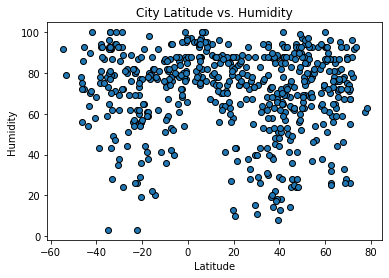

In [38]:
lat_vs_hum = weather_df[["Lat", "Humidity"]]
x_axis = lat_vs_hum["Lat"]
y_axis = lat_vs_hum["Humidity"]
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
lat_vs_hum_plot = plt.scatter(x_axis, y_axis, edgecolors="black")
plt.savefig('../output_data/scatter_humidity.png')

In [17]:
# This plot is comparing the humidity to the distance from the equator. The only pattern that I can see with reference to
# humidity and latitude is that the humidity is higher the closer the cities are to the equator, and have some lower 
# numbers as the cities move away from the equator. But it's not as distinct as the temperature plot.

## Latitude vs. Cloudiness Plot

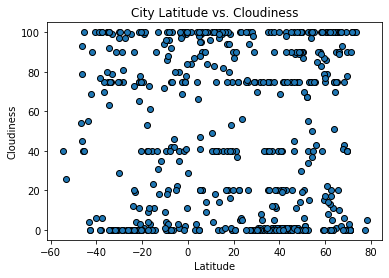

In [39]:
lat_vs_cloud = weather_df[["Lat", "Cloudiness"]]
lat_vs_cloud.dtypes
x_axis = lat_vs_cloud["Lat"]
y_axis = lat_vs_cloud["Cloudiness"]
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
lat_vs_hum_plot = plt.scatter(x_axis, y_axis, edgecolors="black")
plt.savefig('../output_data/scatter_clouds.png')

In [19]:
# This plot is comparint latitude (distance from the equator) to cloudiness. There doesn't seem to be much of a pattern
# for this plot, either.

## Latitude vs. Wind Speed Plot

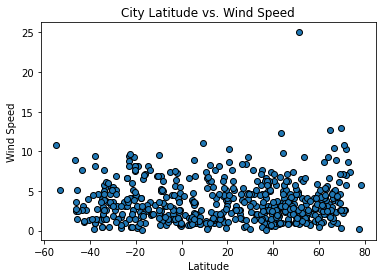

In [40]:
lat_vs_wind = weather_df[["Lat", "Wind Speed"]]
x_axis = lat_vs_wind["Lat"]
y_axis = lat_vs_wind["Wind Speed"]
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
lat_vs_hum_plot = plt.scatter(x_axis, y_axis, edgecolors="black")
plt.savefig('../output_data/scatter_wind.png')

In [21]:
# This plot shows the comparison of latitude and wind speed. It appears that most of the cities on this plot have lower
# wind speeds overall, but there isn't much of a pattern with reference to latitude.

## Linear Regression

In [22]:
# OPTIONAL: Create a function to create Linear Regression plots

def lin_reg(x_axis, y_axis):
   (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
   regress_values = x_axis * slope + intercept
   line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
   plt.plot(x_axis, regress_values,"r")
   plt.show()

In [23]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi = weather_df[weather_df['Lat']>1]
south_hemi = weather_df[weather_df['Lat']<1]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

C:\Users\shelt\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


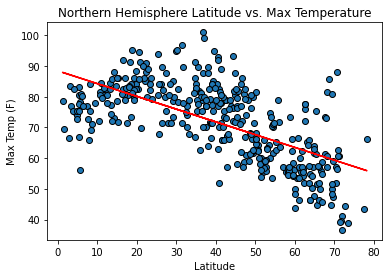

<Figure size 432x288 with 0 Axes>

In [41]:

north_hemi["Max Temp (F)"] = north_hemi["Max Temp"] * 9/5 - 459.67
x_axis = north_hemi["Lat"]
y_axis = north_hemi["Max Temp (F)"]
plt.title("Northern Hemisphere Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
lat_vs_temp_plot = plt.scatter(x_axis, y_axis, edgecolors="black")
lin_reg(x_axis, y_axis)
plt.savefig('../output_data/linreg_ntemp.png')

In [25]:
# This regression line shows that in the Northern Hemisphere, there is a definite relationship between distance from the 
# equator and maximum temperature in these areas. The further away from the equator, the lower the max temps.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

C:\Users\shelt\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


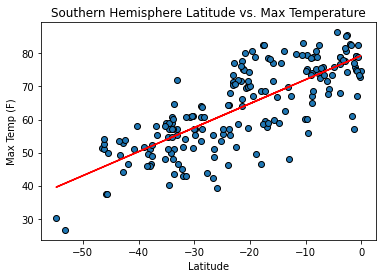

<Figure size 432x288 with 0 Axes>

In [42]:
south_hemi["Max Temp (F)"] = south_hemi["Max Temp"] * 9/5 - 459.67
x_axis = south_hemi["Lat"]
y_axis = south_hemi["Max Temp (F)"]
plt.title("Southern Hemisphere Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
lat_vs_temp_plot = plt.scatter(x_axis, y_axis, edgecolors="black")
lin_reg(x_axis, y_axis)
plt.savefig('../output_data/linreg_stemp.png')

In [27]:
# This regression line shows that in the Southern Hemisphere similarly to the Northern Hemisphere, there is a relationship 
# between distance from the equator and maximum temperature in these areas. The further away from the equator, the lower 
# the max temps.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

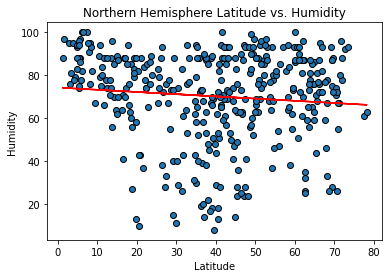

<Figure size 432x288 with 0 Axes>

In [43]:
x_axis = north_hemi["Lat"]
y_axis = north_hemi["Humidity"]
plt.title("Northern Hemisphere Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
lat_vs_temp_plot = plt.scatter(x_axis, y_axis, edgecolors="black")
lin_reg(x_axis, y_axis)
plt.savefig('../output_data/linreg_nhumidity.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

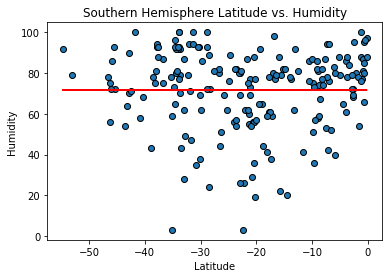

<Figure size 432x288 with 0 Axes>

In [44]:
x_axis = south_hemi["Lat"]
y_axis = south_hemi["Humidity"]
plt.title("Southern Hemisphere Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
lat_vs_temp_plot = plt.scatter(x_axis, y_axis, edgecolors="black")
lin_reg(x_axis, y_axis)
plt.savefig('../output_data/linreg_shumidity.png')

In [30]:
# These two regression plots show that there is not much of a pattern between distance from the equator and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

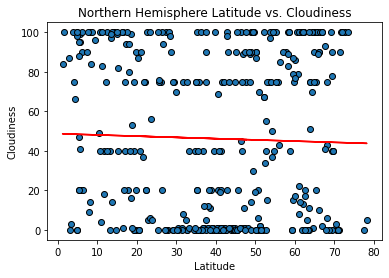

<Figure size 432x288 with 0 Axes>

In [45]:
x_axis = north_hemi["Lat"]
y_axis = north_hemi["Cloudiness"]
plt.title("Northern Hemisphere Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
lat_vs_temp_plot = plt.scatter(x_axis, y_axis, edgecolors="black")
lin_reg(x_axis, y_axis)
plt.savefig('../output_data/linreg_ncloud.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

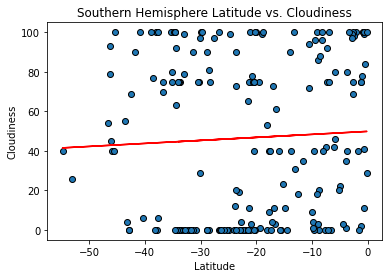

<Figure size 432x288 with 0 Axes>

In [46]:
x_axis = south_hemi["Lat"]
y_axis = south_hemi["Cloudiness"]
plt.title("Southern Hemisphere Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
lat_vs_temp_plot = plt.scatter(x_axis, y_axis, edgecolors="black")
lin_reg(x_axis, y_axis)
plt.savefig('../output_data/linreg_scloud.png')

In [34]:
# When you look at the scatter plots for the two hemispheres, the regression plots both show that there is a slight 
# increase of cloudiness the closer to the equator the city is.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

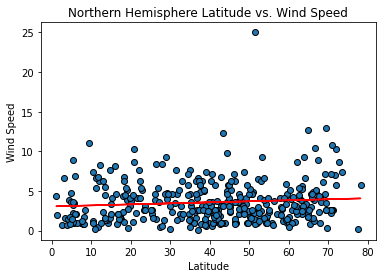

<Figure size 432x288 with 0 Axes>

In [47]:
x_axis = north_hemi["Lat"]
y_axis = north_hemi["Wind Speed"]
plt.title("Northern Hemisphere Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
lat_vs_temp_plot = plt.scatter(x_axis, y_axis, edgecolors="black")
lin_reg(x_axis, y_axis)
plt.savefig('../output_data/linreg_nwind.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

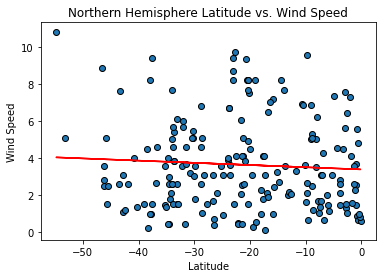

<Figure size 432x288 with 0 Axes>

In [48]:
x_axis = south_hemi["Lat"]
y_axis = south_hemi["Wind Speed"]
plt.title("Northern Hemisphere Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
lat_vs_temp_plot = plt.scatter(x_axis, y_axis, edgecolors="black")
lin_reg(x_axis, y_axis)
plt.savefig('../output_data/linreg_swind.png')

In [ ]:
# The two regression charts of the two different hemispheres also show that there is a slight increase of wind speed 
# the farther away from the equator the cities are.
# It is very interesting to see the differences when we look at the two hemispheres separately. The charts did show some
# more detail than the over all scatter plots could show.